<h2>Testing Box-Cox Transformation on Wine Data</h2>

A friend, Fernando Carillo, raised with me the issue of whether scikit-learn has a Box-Cox transformation for dataframes-- it definitely has a 'normalizer'
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
BUT we couldn't find a Box-Cox Transformation yet so I wrote a short function that uses
'stats' from scipy. Here below I perform an initial test on the red wine dataset from
http://archive.ics.uci.edu/ml/datasets/Wine+Quality

<h2>Import libraries, Load data and plot histograms of all features (including target)</h2>

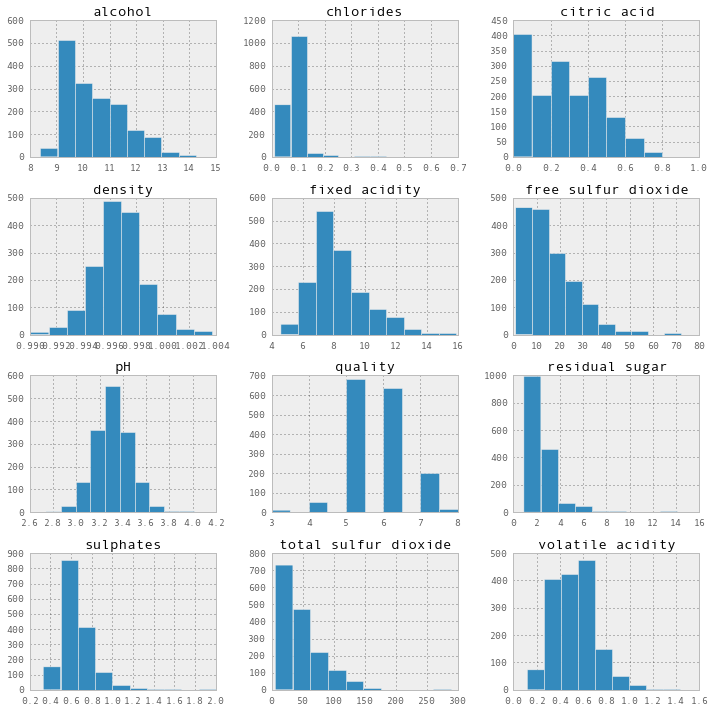

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
df = pd.read_csv('../winequality-red.csv' , sep = ';')
df1 = df.drop('quality' , 1)
df1.head()
pd.DataFrame.hist(df , figsize=[12,12]);

<h2>Perform Box-Cox transformation and plot histograms of all transformed features</h2>

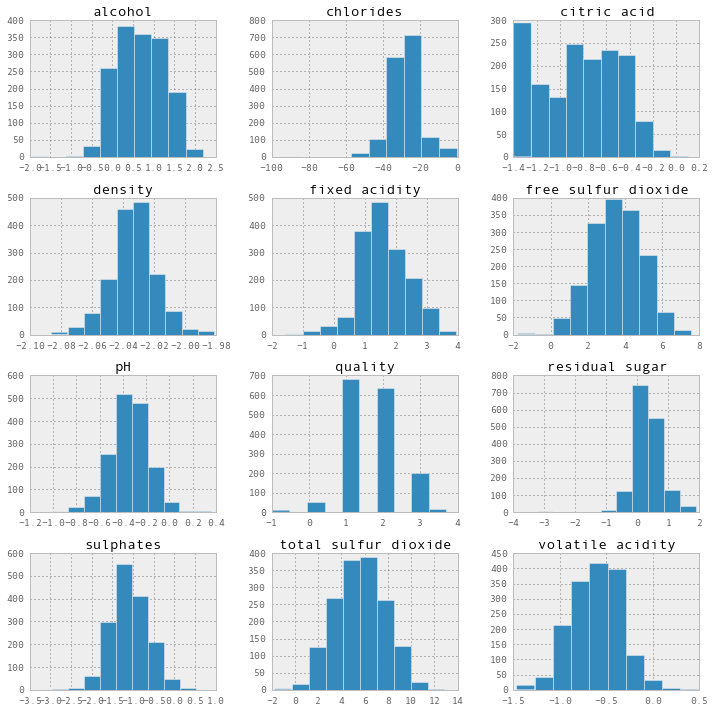

In [2]:
import box_cox as bc
df1 = bc.box_cox(df) #transformed dataframe
pd.DataFrame.hist(df1 , figsize=[12,12]);

Everything looks more Gaussian here, although (i) 'citric acid' is still looking pretty bad & (ii) pH became less symmetric (but how Gaussian was it? I need to analyze the tails): note that it seemed to work best for the distributions that were originally highly skewed (E.g. free SO_2, total SO_2; c.f. 3rd moment). Next steps: look at Q-Q plots to see visually whether the transformed data is more Gaussian, then perform statistical tests such: Shapiro-Wilk, Lilliefors and Anderson-Darling Tests for normality.

<h2> MUCKING AROUND WITH YOUR IMPLEMENTATION OF THE YEO-JOHNSON TRANSFORMATION: A WORK IN PROGRESS</h2>

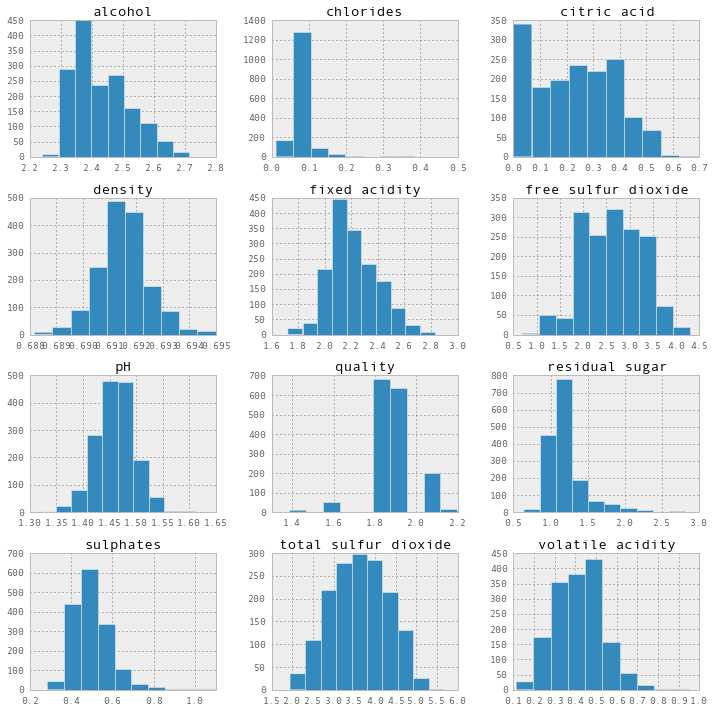

In [13]:
#this is a work in progress as I need to implement optimizing lambda, unless it is given,
#just as in scipy.stats.boxcox
import yeo_johnson as yj
df1 = yj.dfyeo_johnson(df , lmbda = -1) #transformed dataframe
pd.DataFrame.hist(df1 , figsize=[12,12]);